使用するモジュールのimport

In [3]:
# カレントディレクトリの変更（自分の作業フォルダのパスを設定）
os.chdir('/Users/narizuka/GoogleDrive/My Drive/document/講義/立正/情報処理の応用/')
# os.chdir("G:\\マイドライブ\\document\\講義\\立正\\情報処理の応用")

In [59]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from pandas import DataFrame
from scipy import optimize
import material.fit_func as ff

In [6]:
pd.set_option('max_rows', 20)  # 表示する行数
pd.set_option('precision', 10)  # 小数点以下の表示桁
np.set_printoptions(suppress=True, precision=10)
%precision 10  # 小数点以下の表示桁

'%r'

google colab を使う際のセッティング

In [ ]:
# matplotlibで日本語表示
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
# google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# カレントディレクトリを変更（自分の作業フォルダのパスを設定）
os.chdir('/content/drive/My Drive/document/講義/立正/情報処理の応用/')

jupyter lab のcssスタイルを変更（必要な場合だけ）

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.jp-Cell { width:80% !important; margin: 0 auto; }</style>"))
with open('./material/variables.css') as f: 
    css = f.read().replace(';', ' !important;')
display(HTML('<style type="text/css">%s</style>'%css))

## 離散型確率分布

一様分布

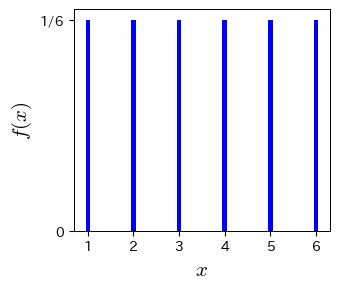

In [89]:
# 一様分布（確率関数）
x = np.arange(1, 7)
fx = np.ones(6) / 6

fig, ax = plt.subplots()
ax.bar(x, fx, width=0.1, color='b')
ax.set_yticks([0, 1/6])
ax.set_yticklabels(['0', '1/6'])
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
fig.savefig('figure/uniform1.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

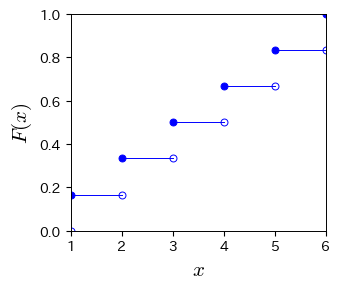

In [90]:
# 一様分布（累積分布）
# データを作成
x1 = np.arange(1, 7)
y1 = np.cumsum(np.ones(6)/6)
x2 = np.arange(1, 7)
y2 = np.cumsum(np.ones(6)/6) - 1/6

# 描画エリアの設定
fig, ax = plt.subplots()
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$F(x)$', fontsize=15)
ax.set_xlim(1, 6)
ax.set_ylim(0, 1)

# 天井関数をプロット
ax.plot(x1, y1, 'bo')
ax.plot(x2, y2, 'bo', mfc='None')
ax.plot(np.c_[x1, x1+1, np.nan*np.ones(x1.size)].reshape(-1), np.c_[y1, y1, np.nan*np.ones(x1.size)].reshape(-1), 'b-')
fig.savefig('figure/uniform_cdf.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

二項分布

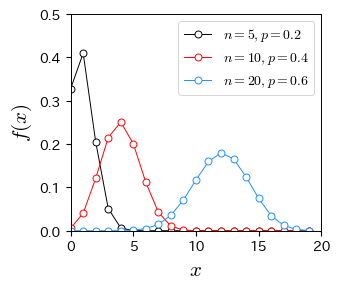

In [58]:
fig, ax = plt.subplots()
k = np.arange(0, 20, 1)
ax.plot(k, ff.bi(k, 5, 0.2), '-o', mfc='w', ms=5, label='$n=5, p=0.2$')
ax.plot(k, ff.bi(k, 10, 0.4), '-o', mfc='w', ms=5, label='$n=10, p=0.4$')
ax.plot(k, ff.bi(k, 20, 0.6), '-o', mfc='w', ms=5, label='$n=20, p=0.6$')
ax.set_xlim(0, 20); ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True)

fig.savefig('figure/binom_np.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

ポアソン分布

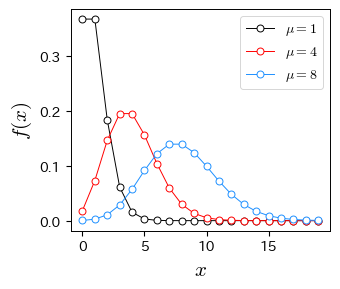

In [69]:
fig, ax = plt.subplots()
k = np.arange(0, 20, 1)
ax.plot(k, ff.po2(k, 1, 1), '-o', mfc='w', ms=5, label='$\mu=1$')
ax.plot(k, ff.po2(k, 4, 1), '-o', mfc='w', ms=5, label='$\mu=4$')
ax.plot(k, ff.po2(k, 8, 1), '-o', mfc='w', ms=5, label='$\mu=8$')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True)

fig.savefig('figure/poisson.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

幾何分布

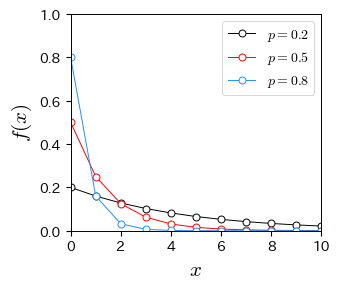

In [56]:
fig, ax = plt.subplots()
k = np.arange(0, 20, 1)
ax.plot(k, ff.ge(k, 0.2), '-o', mfc='w', ms=5, label='$p=0.2$')
ax.plot(k, ff.ge(k, 0.5), '-o', mfc='w', ms=5, label='$p=0.5$')
ax.plot(k, ff.ge(k, 0.8), '-o', mfc='w', ms=5, label='$p=0.8$')
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True)

fig.savefig('figure/geometric.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

超幾何分布

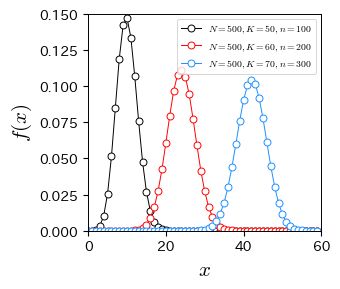

In [76]:
fig, ax = plt.subplots()
k = np.arange(0, 60, 1)
ax.plot(k, ff.hge(k, 500, 100, 50), '-o', mfc='w', ms=5, label='$N=500, K=50, n=100$')
ax.plot(k, ff.hge(k, 500, 200, 60), '-o', mfc='w', ms=5, label='$N=500, K=60, n=200$')
ax.plot(k, ff.hge(k, 500, 300, 70), '-o', mfc='w', ms=5, label='$N=500, K=70, n=300$')
ax.set_xlim(0, 60); ax.set_ylim(0, 0.15)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=7, loc='upper right', frameon=True)

fig.savefig('figure/hgeometric.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

負の二項分布

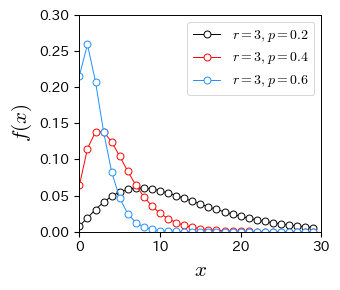

In [67]:
fig, ax = plt.subplots()
k = np.arange(0, 30, 1)
ax.plot(k, ff.nbi(k, 3, 0.2), '-o', mfc='w', ms=5, label='$r=3, p=0.2$')
ax.plot(k, ff.nbi(k, 3, 0.4), '-o', mfc='w', ms=5, label='$r=3, p=0.4$')
ax.plot(k, ff.nbi(k, 3, 0.6), '-o', mfc='w', ms=5, label='$r=3, p=0.6$')
ax.set_xlim(0, 30); ax.set_ylim(0, 0.3)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True)

fig.savefig('figure/nbinom.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

## 連続型確率分布

一様分布

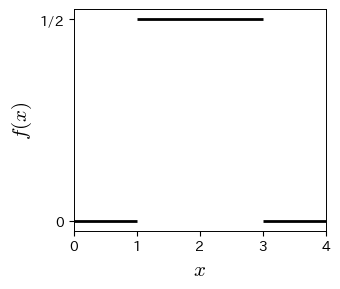

In [96]:
# 一様分布（確率関数）
fig, ax = plt.subplots()
ax.hlines(0, -10, 1, colors='k', lw=2)
ax.hlines(1/2, 1, 3, colors='k', lw=2)
ax.hlines(0, 3, 10, colors='k', lw=2)
ax.set_xlim([0, 4])
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_yticks([0, 1/2])
ax.set_yticklabels(['0', '1/2'])
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
fig.savefig('figure/uniform2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

正規分布

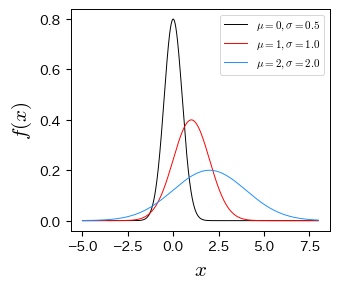

In [97]:
fig, ax = plt.subplots()
x = np.arange(-5, 8, 0.01)
ax.plot(x, ff.nm(x, 0, 0.5), '-', mfc='w', ms=5, label='$\mu=0, \sigma=0.5$')
ax.plot(x, ff.nm(x, 1, 1.0), '-', mfc='w', ms=5, label='$\mu=1, \sigma=1.0$')
ax.plot(x, ff.nm(x, 2, 2.0), '-', mfc='w', ms=5, label='$\mu=2, \sigma=2.0$')
# ax.set_xlim(0, 1); ax.set_ylim(0, 8)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=8, loc='upper right', frameon=True)

fig.savefig('figure/normal2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

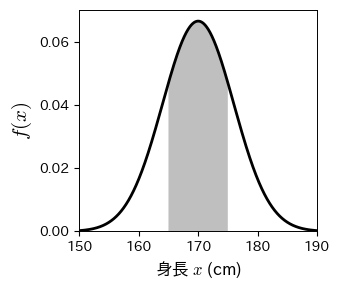

In [168]:
# 正規分布（確率密度関数）
fig, ax = plt.subplots()
x = np.arange(100, 200, 0.01)
ax.plot(x, ff.nm(x, 170, 6), '-', mfc='w', ms=5, lw=2)
x2 = np.arange(165, 175, 0.01)
plt.fill_between(x2, ff.nm(x2, 170, 6), facecolor='gray', alpha=0.5)
ax.set_xlabel('身長 $x$ (cm)', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.set_yticks([0., 0.02, 0.04, 0.06])
ax.set_xlim(150, 190); ax.set_ylim(0, 0.07)

fig.savefig('figure/height1.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

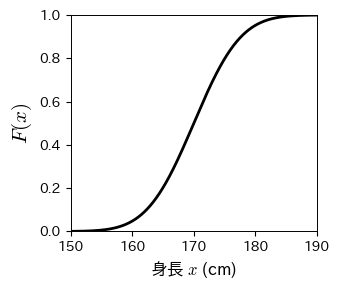

In [169]:
# 正規分布（累積分布）
fig, ax = plt.subplots()
x = np.arange(100, 200, 0.01)
ax.plot(x, ff.NM(x, 170, 6), '-', mfc='w', ms=5, lw=2)
ax.set_xlabel('身長 $x$ (cm)', fontsize=12)
ax.set_ylabel('$F(x)$', fontsize=15)
# ax.set_yticks([])
ax.set_xlim(150, 190); ax.set_ylim(0, 1)

fig.savefig('figure/height2.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

指数分布

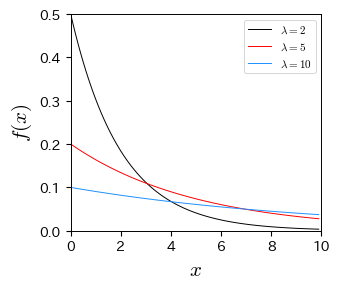

In [100]:
fig, ax = plt.subplots()
x = np.arange(0, 10, 0.1)
ax.plot(x, ff.ep2(x, 2), '-', mfc='w', ms=5, label='$\lambda=2$')
ax.plot(x, ff.ep2(x, 5), '-', mfc='w', ms=5, label='$\lambda=5$')
ax.plot(x, ff.ep2(x, 10), '-', mfc='w', ms=5, label='$\lambda=10$')
ax.set_xlim(0, 10); ax.set_ylim(0, 0.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=8, loc='upper right', frameon=True)

fig.savefig('figure/exponential.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

ガンマ分布

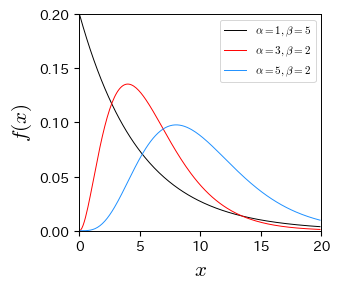

In [118]:
fig, ax = plt.subplots()
x = np.arange(0, 20, 0.1)
ax.plot(x, ff.gm(x, 1, 5), '-', mfc='w', ms=5, label='$\\alpha=1, \\beta=5$')
ax.plot(x, ff.gm(x, 3, 2), '-', mfc='w', ms=5, label='$\\alpha=3, \\beta=2$')
ax.plot(x, ff.gm(x, 5, 2), '-', mfc='w', ms=5, label='$\\alpha=5, \\beta=2$')
ax.set_xlim(0, 20); ax.set_ylim(0, 0.2)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=8, loc='upper right', frameon=True)

fig.savefig('figure/gamma.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

対数正規分布

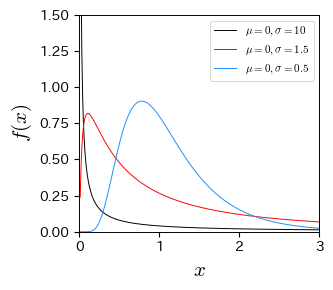

In [136]:
fig, ax = plt.subplots()
x = np.arange(0, 20, 0.01)[1:]
ax.plot(x, ff.ln(x, 0, 10), '-', mfc='w', ms=5, label='$\mu=0, \sigma=10$')
ax.plot(x, ff.ln(x, 0, 1.5), '-', mfc='w', ms=5, label='$\mu=0, \sigma=1.5$')
ax.plot(x, ff.ln(x, 0, 0.5), '-', mfc='w', ms=5, label='$\mu=0, \sigma=0.5$')
ax.set_xlim(0, 3); ax.set_ylim(0, 1.5)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=8, loc='upper right', frameon=True)

fig.savefig('figure/lognormal.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

べき分布

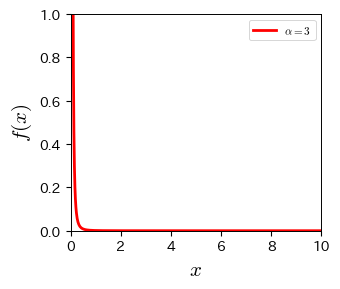

In [155]:
fig, ax = plt.subplots()
x = np.arange(0, 100, 0.01)[1:]
ax.plot(x, x**(-3)/1000, 'r-', lw=2, label='$\\alpha=3$')
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=8, loc='upper right', frameon=True)

fig.savefig('figure/power_law.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)